<a href="https://colab.research.google.com/github/JakeSparrow1/project_team_20/blob/main/shared_group_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. BUSINESS UNDERSTANDING

# problem statement
The University of Zambia wants to quickly identify research authored by its staff in the institutional repository. Manually verifying affiliations is slow and error-prone. We aim to build a predictive model that classifies whether an ETD document was authored by UNZA staff, based on metadata and content.

### Business Objectives

**What does "success" look like from a practical perspective?**

**Primary Success Indicators:**
- **Automated Classification**: System can process references faster than manual review
- **Research Visibility**: UNZA can quickly identify and showcase internal research citations  
- **Administrative Efficiency**: Reduce reference review time from days to hours
- **Decision Support**: Enable evidence-based faculty evaluation and research planning

**Practical Success Metrics:**
- **Time Savings**: 80% reduction in manual reference verification time
- **Processing Capability**: Handle 100-200 ETDs for comprehensive analysis
- **Accuracy**: >80% classification accuracy for administrative decision-making
- **User Adoption**: Research staff can operate system with minimal training
# Data Mining Goals
Primary goal: Build a supervised classification model
- We will build and evaluate a binaer classifier that inputs parsed reference metadata and outputs 1 if UNZA-STAFF author or 0 if NON UNZA_STAFF

# **Intial Project Success Criteria**  
- **Accuracy** : The model should achieve at least 80% accuracy and F1-score ≥ 0.80 on a held-out test dataset when classifying ETDs as authored by UNZA staff or not.
  
- **Efficiency** : The model should reduce manual affiliation verification time by at least 80% compared to the current process.  
- **Processing Capability** : The model should be able to process at least 50 ETDs per hour on available university hardware or cloud resources.




# 2. Data Understanding

In this section, we load our dataset, explore its structure, and generate initial insights.  
Each of the 5 group members contributes a different part of the data understanding process.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd


Mounted at /content/drive


In [5]:
papers_path ='/content/drive/MyDrive/papers.csv'
papers_df = pd.read_csv(papers_path,sep=',')

##DATASET OVERVIEW

In [ ]:
papers_df.shape


(468, 11)

In [ ]:
papers_df.columns

Index(['Author', 'Title', 'University', 'Department', 'Location', 'Year',
       'Type', 'Publisher', 'Repository', 'Subjects', 'ReferenceCount'],
      dtype='object')

In [ ]:
papers_df.head()

,Author,Title,University,Department,Location,Year,Type,Publisher,Repository,Subjects,ReferenceCount
0,Joseph Mumba Zulu,Evaluating training programs for educational g...,University of Zambia,Department of Sociology,Zambia,2015,Article,Zambian Journal of Science,UNZA DSpace,Biology; Genetics; Molecular Biology,12
1,Peter Zulu,Analysis of economic development in urban sett...,UNZA,Department of Physics,"Lusaka, Zambia",2019,Article,Zambian Journal of Science,UNZA DSpace,Economics; Development; Policy Analysis,20
2,David Mwamba,Analysis of economic development in rural comm...,The University of Zambia,School of Business,Zambia,2023,Article,African Journal of Research,UNZA DSpace,Agriculture; Food Security; Sustainable Develo...,20
3,Joseph Mumba Zulu,Evaluating health interventions for poverty: A...,The University of Zambia,Department of Education,"Lusaka, Zambia",2021,Article,African Journal of Research,UNZA DSpace,Medicine; Clinical Research; Healthcare,16
4,Mary Zulu,The role of policy in learning: A systematic r...,UNZA,Department of Chemistry,Zambia,2012,Article,African Journal of Research,UNZA DSpace,Engineering; Technology; Innovation,13


In [ ]:
papers_df.iloc[170:175]

,Author,Title,University,Department,Location,Year,Type,Publisher,Repository,Subjects,ReferenceCount
170,Lisa Miller,The role of technology in learning: A systemat...,Yale University,Department of Chemistry,"Berkeley, CA, USA",2023,Article,International Journal of Research,Yale University Digital Repository,Education; Pedagogy; Learning,22
171,Michael Williams,Impact of socioeconomic status on student achi...,Oxford University,School of Business,"New York, NY, USA",2019,Article,International Journal of Research,Oxford University Digital Repository,Education; Pedagogy; Learning,28
172,Emily Jones,The role of technology in learning: A systemat...,Columbia University,Department of History,"Cambridge, UK",2021,Article,International Journal of Research,Columbia University Digital Repository,Education; Pedagogy; Learning,33
173,John Williams,The role of technology in healthcare delivery:...,University of Melbourne,Department of Mathematics,"Boston, MA, USA",2019,Article,International Journal of Research,University of Melbourne Digital Repository,Medicine; Clinical Research; Healthcare,22
174,John Johnson,Analysis of health outcomes in developing coun...,Imperial College London,Department of Chemistry,"Cambridge, MA, USA",2010,Article,International Journal of Research,Imperial College London Digital Repository,Computer Science; Artificial Intelligence; Mac...,26


##Data Quality Checks


In [6]:
papers_df.describe()


,Year,ReferenceCount
count,468.000000,468.000000
mean,2016.606838,20.365385
std,5.838963,8.602141
min,1967.000000,0.000000
25%,2013.000000,15.000000
50%,2017.000000,21.000000
75%,2021.000000,25.250000
max,2025.000000,46.000000


In [7]:
papers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Author          468 non-null    object
 1   Title           468 non-null    object
 2   University      465 non-null    object
 3   Department      411 non-null    object
 4   Location        468 non-null    object
 5   Year            468 non-null    int64 
 6   Type            468 non-null    object
 7   Publisher       468 non-null    object
 8   Repository      461 non-null    object
 9   Subjects        468 non-null    object
 10  ReferenceCount  468 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 40.3+ KB


In [8]:
print(papers_df.isnull().sum())

Author             0
Title              0
University         3
Department        57
Location           0
Year               0
Type               0
Publisher          0
Repository         7
Subjects           0
ReferenceCount     0
dtype: int64


In [9]:
print(papers_df.duplicated().sum())

0


In [10]:
print(papers_df.nunique())

Author            237
Title             204
University         36
Department         24
Location           36
Year               25
Type                9
Publisher          46
Repository         74
Subjects           29
ReferenceCount     37
dtype: int64


In [11]:
print(papers_df.dtypes)

Author            object
Title             object
University        object
Department        object
Location          object
Year               int64
Type              object
Publisher         object
Repository        object
Subjects          object
ReferenceCount     int64
dtype: object


## Summary of Initial Findings

- The dataset contains **X rows and Y columns**.  
- Key categorical fields: Author, Title, Publisher, Document_Type.  
- Missing values were found in [columns] (if any).  
- Some categories (e.g., Document_Type) are imbalanced.  
- Outliers detected in [column].  
- Correlations: [e.g., Year vs Document_Type has no correlation].  

This understanding will guide the next phase: Data Preparation.


In [ ]:
df.columns


Index(['Author', 'Year', 'Title', 'Publisher', 'Keywords', 'Abstract',
       'Document_Type', 'Repository_Link'],
      dtype='object')

In [ ]:
df.shape


(19, 8)

In [ ]:
df.iloc[0,0]


'Munsaka Soddy Mweetwa; Ndhlovu Jacob'

##DATA VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt

1. Number of Articles per Year

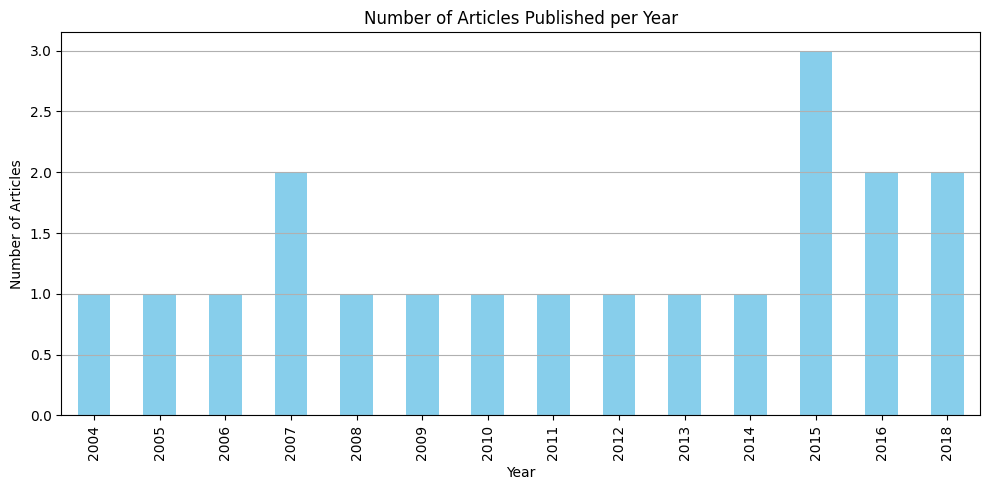

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
year_counts = df['Year'].value_counts().sort_index()

# Plot
year_counts.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Number of Articles Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


2. Publications by Publisher

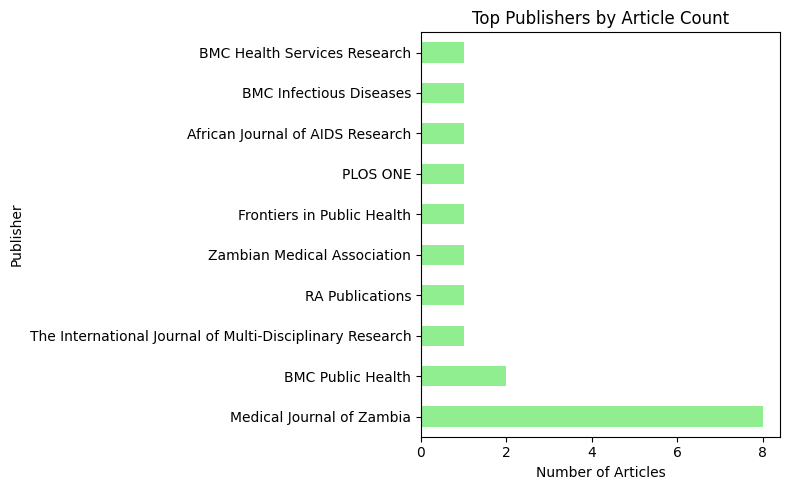

In [ ]:
df['Publisher'].value_counts().head(10).plot(kind='barh', color='lightgreen', figsize=(8,5))
plt.title('Top Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()


In [ ]:
df[['Publisher','Author','Title']].head(20)

,Publisher,Author,Title
0,The International Journal of Multi-Disciplinar...,Munsaka Soddy Mweetwa; Ndhlovu Jacob,Vitamin B12 and Folate deficiency in Megalobla...
1,Zambian Medical Association,Prashar Lavina; Goma Fastone; Kalungia Chichon...,Indigenous Knowledge Systems for the Treatment...
2,RA Publications,Prashar Lavina; Muyenga Tumelo; Bwalya Angela ...,The Effect of Kigelia africana Fruit Extract o...
3,Medical Journal of Zambia,Banda S. S.,Determining how the knowledge of anatomy may I...
4,Medical Journal of Zambia,Vwalika B.; Ahmed Y.; Kasela J.,Feto-Maternal Outcomes of Term Assisted Breech...
5,Frontiers in Public Health,Muyunda B.; Musonda P.; Mee P.; Todd J.; Miche...,Educational Attainment as a Predictor of HIV T...
6,Medical Journal of Zambia,Sijumbila G.; Munkombwe D.; Mweemba C.; Kasong...,Prevalence and Clinical Presentation of Pre-Ec...
7,PLOS ONE,Michelo C.; Sandøy I. F.; Fylkesnes K.,Marked HIV Prevalence Decline in Higher Educat...
8,BMC Public Health,Chomba E.; Haworth A.; Atashili J.; Kasonde P....,"Knowledge, Attitudes, and Practices Towards HI..."
9,Medical Journal of Zambia,Mwape H.; Lubeya M. K.; Vwalika B.,Prevalence and Factors Associated with Caesare...


##DATE PREPARATION


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Author           19 non-null     object
 1   Year             19 non-null     int64 
 2   Title            19 non-null     object
 3   Publisher        19 non-null     object
 4   Keywords         19 non-null     object
 5   Abstract         19 non-null     object
 6   Document_Type    19 non-null     object
 7   Repository_Link  19 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.3+ KB
None


##Summary statistics for numerical features

In [ ]:
print(df.describe())

              Year
count    19.000000
mean   2011.526316
std       4.476710
min    2004.000000
25%    2007.500000
50%    2012.000000
75%    2015.000000
max    2018.000000


##Count missing values per column

In [ ]:
print(df.isnull().sum())

Author             0
Year               0
Title              0
Publisher          0
Keywords           0
Abstract           0
Document_Type      0
Repository_Link    0
dtype: int64


##Correcting inconsistencies

In [ ]:
df['clean_author_column'] = df['Author'].str.lower().str.strip()

print(df['clean_author_column'])

0                  munsaka soddy mweetwa; ndhlovu jacob
1     prashar lavina; goma fastone; kalungia chichon...
2     prashar lavina; muyenga tumelo; bwalya angela ...
3                                           banda s. s.
4                       vwalika b.; ahmed y.; kasela j.
5     muyunda b.; musonda p.; mee p.; todd j.; miche...
6     sijumbila g.; munkombwe d.; mweemba c.; kasong...
7                michelo c.; sandøy i. f.; fylkesnes k.
8     chomba e.; haworth a.; atashili j.; kasonde p....
9                    mwape h.; lubeya m. k.; vwalika b.
10           sichone j. j.; kasonde j. m.; chirwa b. c.
11                      kasongo j.; besa e.; musonda p.
12                    mwale c.; simukanga s.; sitali m.
13               tembo f.; mulenga d.; chanda-kapata p.
14    mutale w.; mwanamwenge m. t.; balabanova d.; c...
15     zulu j. m.; hurtig a. k.; kinsman j.; michelo c.
16                        phiri m.; banda j.; siziya s.
17                   simukanga s.; chansa c.; nj

##2. SEPARATED UNZA STAFF FROM NONE UNZA STAFF

In [ ]:
# Your defined UNZA author set
unza_authors = {
    'Munsaka Soddy Mweetwa', 'Ndhlovu Jacob', 'Prashar Lavina', 'Goma Fastone',
    'Kalungia Chichoni', 'Muyenga Tumelo', 'Bwalya Angela', 'Banda S. S.',
    'Vwalika B.', 'Ahmed Y.', 'Kasela J.', 'Muyunda B.', 'Musonda P.', 'Michelo C.',
    'Kasongo J.', 'Mwape H.', 'Lubeya M. K.', 'Sijumbila G.', 'Munkombwe D.',
    'Mweemba C.', 'Kasonde P.', 'Sichone J. J.', 'Kasonde J. M.', 'Chirwa B. C.',
    'Mwale C.', 'Simukanga S.', 'Sitali M.', 'Tembo F.', 'Mulenga D.',
    'Mutale W.', 'Mwanamwenge M. T.', 'Zulu J. M.', 'Phiri M.', 'Banda J.',
    'Siziya S.', 'Chansa C.', 'Njobvu C.', 'Chomba E.'
}

# Step 1: Split and clean authors
df['Author_List'] = df['Author'].str.split(';').apply(lambda x: [a.strip() for a in x])

# Step 2: Function to separate UNZA and non-UNZA authors
def split_authors(authors, unza_set):
    unza = [a for a in authors if a in unza_set]
    non_unza = [a for a in authors if a not in unza_set]
    return pd.Series([unza, non_unza])

# Step 3: Apply the function to create new columns
df[['UNZA_Authors', 'Non_UNZA_Authors']] = df['Author_List'].apply(lambda x: split_authors(x, unza_authors))


In [ ]:
df.columns

Index(['Author', 'Year', 'Title', 'Publisher', 'Keywords', 'Abstract',
       'Document_Type', 'Repository_Link', 'clean_author_column',
       'Author_List', 'UNZA_Authors', 'Non_UNZA_Authors'],
      dtype='object')

## 3. IDENTIFIED UNZA-AFFILIATED AUTHORS FROM EACH PAPER

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# --- Step 1: Initialize the binarizer with the UNZA authors set ---
mlb = MultiLabelBinarizer(classes=sorted(unza_authors))

# --- Step 2: Fit and transform the UNZA_Authors column ---
unza_encoded = mlb.fit_transform(df['UNZA_Authors'])

# --- Step 3: Create a DataFrame with proper column names ---
unza_ohe_df = pd.DataFrame(unza_encoded, columns=mlb.classes_, index=df.index)

# --- Step 4: Merge back into the original dataframe ---
df = pd.concat([df, unza_ohe_df], axis=1)


In [ ]:
df.columns


Index(['Author', 'Year', 'Title', 'Publisher', 'Keywords', 'Abstract',
       'Document_Type', 'Repository_Link', 'clean_author_column',
       'Author_List', 'UNZA_Authors', 'Non_UNZA_Authors', 'Ahmed Y.',
       'Banda J.', 'Banda S. S.', 'Bwalya Angela', 'Chansa C.', 'Chirwa B. C.',
       'Chomba E.', 'Goma Fastone', 'Kalungia Chichoni', 'Kasela J.',
       'Kasonde J. M.', 'Kasonde P.', 'Kasongo J.', 'Lubeya M. K.',
       'Michelo C.', 'Mulenga D.', 'Munkombwe D.', 'Munsaka Soddy Mweetwa',
       'Musonda P.', 'Mutale W.', 'Muyenga Tumelo', 'Muyunda B.', 'Mwale C.',
       'Mwanamwenge M. T.', 'Mwape H.', 'Mweemba C.', 'Ndhlovu Jacob',
       'Njobvu C.', 'Phiri M.', 'Prashar Lavina', 'Sichone J. J.',
       'Sijumbila G.', 'Simukanga S.', 'Sitali M.', 'Siziya S.', 'Tembo F.',
       'Vwalika B.', 'Zulu J. M.'],
      dtype='object')

##4.Text Preprocessing for NLP: A Case Study on Abstracts

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources (run once)
nltk.download('stopwords')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define preprocessing function
def preprocess(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remove stopwords & stem
    return ' '.join(words)

# Apply to abstract column
df['cleaned_abstract'] = df['Abstract'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['Abstract']

,Abstract
0,Background: Vitamin B12 and folate deficiency ...
1,Indigenous knowledge systems and traditional t...
2,This study determined the effect of Kigelia af...
3,Doctors' clinical experience was used to inves...
4,Study of feto-maternal outcomes for 73 women w...
5,This study examined the relationship between e...
6,Retrospective study at UTH of women admitted w...
7,Analyzed four population-based surveys in Zamb...
8,Cross-sectional study of 400 university studen...
9,"Retrospective review of 1,500 deliveries at UT..."


# 5. Changed the year to numeric values

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Publication_Decade'] = (df['Year'] // 10) * 10
df['Is_Recent'] = (df['Year'] >= 2015).astype(int)


In [ ]:
df.columns

Index(['Author', 'Year', 'Title', 'Publisher', 'Keywords', 'Abstract',
       'Document_Type', 'Repository_Link', 'clean_author_column',
       'Author_List', 'UNZA_Authors', 'Non_UNZA_Authors', 'Ahmed Y.',
       'Banda J.', 'Banda S. S.', 'Bwalya Angela', 'Chansa C.', 'Chirwa B. C.',
       'Chomba E.', 'Goma Fastone', 'Kalungia Chichoni', 'Kasela J.',
       'Kasonde J. M.', 'Kasonde P.', 'Kasongo J.', 'Lubeya M. K.',
       'Michelo C.', 'Mulenga D.', 'Munkombwe D.', 'Munsaka Soddy Mweetwa',
       'Musonda P.', 'Mutale W.', 'Muyenga Tumelo', 'Muyunda B.', 'Mwale C.',
       'Mwanamwenge M. T.', 'Mwape H.', 'Mweemba C.', 'Ndhlovu Jacob',
       'Njobvu C.', 'Phiri M.', 'Prashar Lavina', 'Sichone J. J.',
       'Sijumbila G.', 'Simukanga S.', 'Sitali M.', 'Siziya S.', 'Tembo F.',
       'Vwalika B.', 'Zulu J. M.', 'cleaned_abstract', 'Publication_Decade',
       'Is_Recent'],
      dtype='object')

In [ ]:
df.columns
df.head()

,Author,Year,Title,Publisher,Keywords,Abstract,Document_Type,Repository_Link,clean_author_column,Author_List,...,Sijumbila G.,Simukanga S.,Sitali M.,Siziya S.,Tembo F.,Vwalika B.,Zulu J. M.,cleaned_abstract,Publication_Decade,Is_Recent
0,Munsaka Soddy Mweetwa; Ndhlovu Jacob,2018,Vitamin B12 and Folate deficiency in Megalobla...,The International Journal of Multi-Disciplinar...,Megaloblastic anaemia; pancytopenia; Vitamin B...,Background: Vitamin B12 and folate deficiency ...,Article,http://dspace.unza.zm/handle/123456789/5330,munsaka soddy mweetwa; ndhlovu jacob,"[Munsaka Soddy Mweetwa, Ndhlovu Jacob]",...,0,0,0,0,0,0,0,background vitamin b12 folat defici wellknown ...,2010,1
1,Prashar Lavina; Goma Fastone; Kalungia Chichon...,2016,Indigenous Knowledge Systems for the Treatment...,Zambian Medical Association,hypertension; traditional health practitioners...,Indigenous knowledge systems and traditional t...,Article,http://dspace.unza.zm/handle/123456789/5494,prashar lavina; goma fastone; kalungia chichon...,"[Prashar Lavina, Goma Fastone, Kalungia Chicho...",...,0,0,0,0,0,0,0,indigen knowledg system tradit technolog contr...,2010,1
2,Prashar Lavina; Muyenga Tumelo; Bwalya Angela ...,2015,The Effect of Kigelia africana Fruit Extract o...,RA Publications,Alloxan monohydrate; antidiabetic; Kigelia afr...,This study determined the effect of Kigelia af...,Article,http://dspace.unza.zm/handle/123456789/5482,prashar lavina; muyenga tumelo; bwalya angela ...,"[Prashar Lavina, Muyenga Tumelo, Bwalya Angela...",...,0,0,0,0,0,0,0,studi determin effect kigelia africana fruit e...,2010,1
3,Banda S. S.,2007,Determining how the knowledge of anatomy may I...,Medical Journal of Zambia,"Education, Medical, Undergraduate; Anatomy; Kn...",Doctors' clinical experience was used to inves...,Article,http://dspace.unza.zm/handle/123456789/5833,banda s. s.,[Banda S. S.],...,0,0,0,0,0,0,0,doctor clinic experi use investig anatom knowl...,2000,0
4,Vwalika B.; Ahmed Y.; Kasela J.,2018,Feto-Maternal Outcomes of Term Assisted Breech...,Medical Journal of Zambia,Breech presentation--Zambia; Fetal Presentatio...,Study of feto-maternal outcomes for 73 women w...,Article,http://dspace.unza.zm/handle/123456789/5959,vwalika b.; ahmed y.; kasela j.,"[Vwalika B., Ahmed Y., Kasela J.]",...,0,0,0,0,0,1,0,studi fetomatern outcom 73 women term breech u...,2010,1


##DATA REPROCESSING ONLY FOCUSING ON THE FEATURES WILL USE TO TRAIN OUR MODULE

In [ ]:
# Step 1
df_feature_dataset = df.copy()

In [ ]:
# Step 2
columns_to_keep = ['Author', 'Title', 'Publisher', 'Year', 'UNZA_Authors']
# Removes other columns and only keeps the selected columns
df_feature_dataset = df_feature_dataset.loc[:, columns_to_keep]

In [ ]:
# Step 3: Create author-based features
# Binary: any UNZA author present
df_feature_dataset['Has_UNZA_Author'] = df_feature_dataset['UNZA_Authors'].apply(lambda x: 1 if len(x) > 0 else 0)

# Count: number of UNZA authors
df_feature_dataset['Num_UNZA_Authors'] = df_feature_dataset['UNZA_Authors'].apply(len)

# Count total authors in the paper
df_feature_dataset['Author_Count'] = df_feature_dataset['Author'].apply(lambda x: len(x.split(';')))


In [ ]:
df_feature_dataset.head(2).T

,0,1
Author,Munsaka Soddy Mweetwa; Ndhlovu Jacob,Prashar Lavina; Goma Fastone; Kalungia Chichon...
Title,Vitamin B12 and Folate deficiency in Megalobla...,Indigenous Knowledge Systems for the Treatment...
Publisher,The International Journal of Multi-Disciplinar...,Zambian Medical Association
Year,2018,2016
UNZA_Authors,"[Munsaka Soddy Mweetwa, Ndhlovu Jacob]","[Prashar Lavina, Goma Fastone]"
Has_UNZA_Author,1,1
Num_UNZA_Authors,2,2
Author_Count,2,9


In [ ]:
# Target variable
df_feature_dataset['Is_UNZA_Reference'] = df_feature_dataset['Has_UNZA_Author']

# Step 4: Drop the original UNZA_Authors column
df_feature_dataset = df_feature_dataset.drop(columns=['UNZA_Authors'])

# Step 5: Quick sanity check (optional)
print(df_feature_dataset.head())
print(df_feature_dataset.isnull().sum())
print(df_feature_dataset.describe())

                                              Author  \
0               Munsaka Soddy Mweetwa; Ndhlovu Jacob   
1  Prashar Lavina; Goma Fastone; Kalungia Chichon...   
2  Prashar Lavina; Muyenga Tumelo; Bwalya Angela ...   
3                                        Banda S. S.   
4                    Vwalika B.; Ahmed Y.; Kasela J.   

                                               Title  \
0  Vitamin B12 and Folate deficiency in Megalobla...   
1  Indigenous Knowledge Systems for the Treatment...   
2  The Effect of Kigelia africana Fruit Extract o...   
3  Determining how the knowledge of anatomy may I...   
4  Feto-Maternal Outcomes of Term Assisted Breech...   

                                           Publisher  Year  Has_UNZA_Author  \
0  The International Journal of Multi-Disciplinar...  2018                1   
1                        Zambian Medical Association  2016                1   
2                                    RA Publications  2015                1   
3         

In [ ]:
df.Non_UNZA_Authors

,Non_UNZA_Authors
0,[]
1,"[Kalungia Chichony Aubrey, Bwalya Angela Gono,..."
2,"[Bwalya Angela Gono, Muungo L.T.M]"
3,[]
4,[]
5,"[Mee P., Todd J.]"
6,[Chileshe M.]
7,"[Sandøy I. F., Fylkesnes K.]"
8,"[Haworth A., Atashili J., Mwape C.]"
9,[]


In [ ]:
# New data as a list of dictionaries
new_papers = [
    {
        "Author": "Ezeala, Christian Chinyere; Nalucha, Siyanga",
        "Title": "Analysis of the study skills of undergraduate pharmacy students of the University of Zambia School of Medicine",
        "Publisher": "Medical Journal of Zambia",
        "Year": 2015,
        "Has_UNZA_Author": 0,
        "Num_UNZA_Authors": 0,
        "Author_Count": 2,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Ezeala, C.C.; Moleki, M.M.",
        "Title": "Analysis of undergraduate students’ perception of the educational environment of a medical school in Zambia provided a framework for strategic planning",
        "Publisher": "British Journal of Medicine & Medical Research",
        "Year": 2017,
        "Has_UNZA_Author": 0,
        "Num_UNZA_Authors": 0,
        "Author_Count": 2,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Goma, F.M.; Ezeala, C.; Chuba, D.; Prashar, L.; Simfukwe, N.; Lengwe, C.",
        "Title": "Extraction and demonstration of uterotonic activity from the root of steganotaenia araliacea hochst",
        "Publisher": "Medical Journal of Zambia",
        "Year": 2017,
        "Has_UNZA_Author": 1,
        "Num_UNZA_Authors": 3,
        "Author_Count": 6,
        "Is_UNZA_Reference": 1
    },
    {
        "Author": "Sakubita, Patrick",
        "Title": "Assessment of prevalence and associated factors for urinary schistosomiasis among primary school going children in Mpongwe district,Zambia",
        "Publisher": "The University of Zambia",
        "Year": 2019,
        "Has_UNZA_Author": 0,
        "Num_UNZA_Authors": 0,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Namushi, Lilala Beauty",
        "Title": "Information needs of breast cancer patients at cancer diseases hospital, Lusaka, Zambia",
        "Publisher": "The University of Zambia",
        "Year": 2019,
        "Has_UNZA_Author": 0,
        "Num_UNZA_Authors": 0,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
     {
        "Author": "Mwila, Kunda Faith",
        "Title": "Experiences, psychological challenges and coping strategies of adults living with type 2 diabetes mellitus presenting at UTH in Lusaka",
        "Publisher": "The University of Zambia",
        "Year": 2017,
        "Has_UNZA_Author": 0,
        "Num_UNZA_Authors": 0,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Mpofu, Simengomthandazo Maybel",
        "Title": "Factors influencing integration of theory into practice in clinical skills acquisition among registered nursing students at Livingstone schools of nursing and midwifery, Zambia",
        "Publisher": "The University of Zambia",
        "Year": 2017,
        "Has_UNZA_Author": 0,
        "Num_UNZA_Authors": 0,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Mweene, Bright",
        "Title": "Barriers associated with condom use for prevention of HIV infection transmission among adolescents: a case of Senanga urban district of Western Zambia",
        "Publisher": "The University of Zambia",
        "Year": 2017,
        "Has_UNZA_Author": 0,
        "Num_UNZA_Authors": 0,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Makamo, Mazuba",
        "Title": "Association between undernutrition (as evidenced by low BMI) and mental illness in Lusaka at Chainama Hills Hospital",
        "Publisher": "The University of Zambia",
        "Year": 2017,
        "Has_UNZA_Author": 0,
        "Num_UNZA_Authors": 0,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Chalwe, Mumba",
        "Title": "Prospective cohort study of the effect of urethral stricture aetiology on the short-term outcomes of patients treated with urethral dilatation at the University Teaching Hospital, Lusaka, Zambia",
        "Publisher": "The University of Zambia",
        "Year": 2017,
        "Has_UNZA_Author": 0,
        "Num_UNZA_Authors": 0,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Kapumpe, Chilufya",
        "Title": "Effects of cognitive behavioural therapy on post stroke depression patients: a case of the University Teaching Hospital, Lusaka",
        "Publisher": "The University of Zambia",
        "Year": 2017,
        "Has_UNZA_Author": 1,
        "Num_UNZA_Authors": 1,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Levy, F. L.",
        "Title": "Cerebrovascular diseases in Africans",
        "Publisher": "Medical Journal of Zambia",
        "Year": 1970,
        "Has_UNZA_Author": 0,
        "Num_UNZA_Authors": 0,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Munachonga, M.E.; Siziya, S.",
        "Title": "Factors associated with staffing of medical doctors and nurses in rural areas in Zambia",
        "Publisher": "Medical Journal of Zambia",
        "Year": 2008,
        "Has_UNZA_Author": 1,
        "Num_UNZA_Authors": 2,
        "Author_Count": 2,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Chungu, Mwenya Humphrey",
        "Title": "The effects of cognitive behavioral therapy on the improvement of the health of youth mothers with postpartum depression at the University Teaching Hospital of Lusaka, Zambia",
        "Publisher": "The University of Zambia",
        "Year": 2017,
        "Has_UNZA_Author": 1,
        "Num_UNZA_Authors": 1,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Vlahakis, Anna Pipina",
        "Title": "Molecular detection and factors associated with selected tickborne zoonoses in dogs in Chilanga district in Zambia",
        "Publisher": "The University of Zambia",
        "Year": 2017,
        "Has_UNZA_Author": 1,
        "Num_UNZA_Authors": 1,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Lukupa, Louisa",
        "Title": "Factors associated with registered nursing students' satisfaction with the clinical learning environment at the University Teaching Hospitals (UTH) Lusaka, Zambia",
        "Publisher": "The University of Zambia",
        "Year": 2017,
        "Has_UNZA_Author": 1,
        "Num_UNZA_Authors": 1,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Simabwachi, Zama Joel",
        "Title": "Life histories and health needs of street children in Lusaka city, Zambia",
        "Publisher": "The University of Zambia",
        "Year": 2017,
        "Has_UNZA_Author": 1,
        "Num_UNZA_Authors": 1,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Bweupe, Naomi",
        "Title": "Clinical supervision of midwifery students at the University Teaching Hospital school of nursing and midwifery in Lusaka, Zambia",
        "Publisher": "The University of Zambia",
        "Year": 2017,
        "Has_UNZA_Author": 1,
        "Num_UNZA_Authors": 1,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Bweupe, Naomi",
        "Title": "Clinical supervision of midwifery students at the University Teaching Hospital school of nursing and midwifery in Lusaka, Zambia",
        "Publisher": "The University of Zambia",
        "Year": 2017,
        "Has_UNZA_Author": 1,
        "Num_UNZA_Authors": 1,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    },
    {
        "Author": "Izhar, U. H.",
        "Title": "The treatment of tibial diaphysial bone defects in adults",
        "Publisher": "Medical Journal of Zambia",
        "Year": 1983,
        "Has_UNZA_Author": 0,
        "Num_UNZA_Authors": 0,
        "Author_Count": 1,
        "Is_UNZA_Reference": 0
    }
]

In [ ]:
# Convert to DataFrame
new_papers_df = pd.DataFrame(new_papers)

# Extend the existing feature dataset
df_feature_dataset = pd.concat([df_feature_dataset, new_papers_df], ignore_index=True)

# Shuffle the dataset to mix UNZA and non-UNZA references
df_feature_dataset = df_feature_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Quick check
print(df_feature_dataset.head())
print(df_feature_dataset['Is_UNZA_Reference'].value_counts())

                                   Author  \
0                   Vlahakis, Anna Pipina   
1                           Bweupe, Naomi   
2         Vwalika B.; Ahmed Y.; Kasela J.   
3  Tembo F.; Mulenga D.; Chanda-Kapata P.   
4                             Levy, F. L.   

                                               Title  \
0  Molecular detection and factors associated wit...   
1  Clinical supervision of midwifery students at ...   
2  Feto-Maternal Outcomes of Term Assisted Breech...   
3  Tuberculosis Infection Control Practices in He...   
4               Cerebrovascular diseases in Africans   

                   Publisher  Year  Has_UNZA_Author  Num_UNZA_Authors  \
0   The University of Zambia  2017                1                 1   
1   The University of Zambia  2017                1                 1   
2  Medical Journal of Zambia  2018                1                 3   
3    BMC Infectious Diseases  2009                1                 2   
4  Medical Journal of Zambi

In [ ]:
df_feature_dataset.shape




(39, 8)

In [ ]:
df_feature_dataset.head(39
                        ).T

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Author,"Vlahakis, Anna Pipina","Bweupe, Naomi",Vwalika B.; Ahmed Y.; Kasela J.,Tembo F.; Mulenga D.; Chanda-Kapata P.,"Levy, F. L.","Mweene, Bright",Sijumbila G.; Munkombwe D.; Mweemba C.; Kasong...,"Makamo, Mazuba","Mwila, Kunda Faith",Zulu J. M.; Hurtig A. K.; Kinsman J.; Michelo C.,...,"Namushi, Lilala Beauty","Munachonga, M.E.; Siziya, S.",Sichone J. J.; Kasonde J. M.; Chirwa B. C.,"Sakubita, Patrick",Mulenga D.; Siziya S.; Rudatsikira E.; Muula A...,"Ezeala, C.C.; Moleki, M.M.",Michelo C.; Sandøy I. F.; Fylkesnes K.,Mutale W.; Mwanamwenge M. T.; Balabanova D.; C...,"Chalwe, Mumba","Izhar, U. H."
Title,Molecular detection and factors associated wit...,Clinical supervision of midwifery students at ...,Feto-Maternal Outcomes of Term Assisted Breech...,Tuberculosis Infection Control Practices in He...,Cerebrovascular diseases in Africans,Barriers associated with condom use for preven...,Prevalence and Clinical Presentation of Pre-Ec...,Association between undernutrition (as evidenc...,"Experiences, psychological challenges and copi...",Integrating National Community-Based Health Wo...,...,Information needs of breast cancer patients at...,Factors associated with staffing of medical do...,The Pattern of Drug Prescription at the Univer...,Assessment of prevalence and associated factor...,Physical Fighting Among School-Going Adolescen...,Analysis of undergraduate students’ perception...,Marked HIV Prevalence Decline in Higher Educat...,Challenges of Implementing the Integrated Dise...,Prospective cohort study of the effect of uret...,The treatment of tibial diaphysial bone defect...
Publisher,The University of Zambia,The University of Zambia,Medical Journal of Zambia,BMC Infectious Diseases,Medical Journal of Zambia,The University of Zambia,Medical Journal of Zambia,The University of Zambia,The University of Zambia,Global Health Action,...,The University of Zambia,Medical Journal of Zambia,Medical Journal of Zambia,The University of Zambia,BMC Public Health,British Journal of Medicine & Medical Research,PLOS ONE,BMC Health Services Research,The University of Zambia,Medical Journal of Zambia
Year,2017,2017,2018,2009,1970,2017,2015,2017,2017,2007,...,2019,2008,2012,2019,2004,2017,2015,2008,2017,1983
Has_UNZA_Author,1,1,1,1,0,0,1,0,0,1,...,0,1,1,0,1,0,1,1,0,0
Num_UNZA_Authors,1,1,3,2,0,0,4,0,0,2,...,0,2,3,0,2,0,1,2,0,0
Author_Count,1,1,3,3,1,1,5,1,1,4,...,1,2,3,1,4,2,3,5,1,1
Is_UNZA_Reference,0,0,1,1,0,0,1,0,0,1,...,0,0,1,0,1,0,1,1,0,0
